In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy.feature as cart
import cartopy.io.img_tiles as cimgt
from cartopy.util import add_cyclic_point
import cartopy.mpl.ticker as cticker
import calendar

## Load Ice concentration dataset

In [13]:
# Open the file with the ice concentration data
thepath = r"C:\Users\rbendopa\OneDrive - George Mason University - O365 Production\Class\Clim680\data\icec.mon.mean.nc"
ds_icec = xr.open_dataset(thepath)

# Select the time period
ds_icec = ds_icec.sel(time=slice(ao['time'][0],ao['time'][-1]))
ds_icec

<xarray.Dataset> Size: 218MB
Dimensions:  (lat: 180, lon: 360, time: 840)
Coordinates:
  * lat      (lat) float32 720B 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time     (time) datetime64[ns] 7kB 1950-01-01 1950-02-01 ... 2019-12-01
Data variables:
    icec     (time, lat, lon) float32 218MB ...
Attributes:
    title:            created 05/2014 from data provided by JRA
    history:          Created 12/2012 from data obtained from JRA by ESRL/PSD
    platform:         Analyses
    citation:         Hirahara, S., Ishii, M., and Y. Fukuda,2014: Centennial...
    institution:      NOAA ESRL/PSD
    Conventions:      CF-1.2
    dataset_title:    COBE-SST2 Sea Surface Temperature and Ice
    original_source:  https://climate.mri-jma.go.jp/pub/ocean/cobe-sst2/
    References:       https://www.psl.noaa.gov/data/gridded/cobe2.html

## Calculate Climatology

In [17]:
# Calculate climatology
clim = ds_icec.groupby('time.month').mean('time')
ds_anom = ds_icec.groupby('time.month') -clim
ds_anom

<xarray.Dataset> Size: 218MB
Dimensions:  (lat: 180, lon: 360, time: 840)
Coordinates:
  * lat      (lat) float32 720B 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time     (time) datetime64[ns] 7kB 1950-01-01 1950-02-01 ... 2019-12-01
    month    (time) int64 7kB 1 2 3 4 5 6 7 8 9 10 11 ... 3 4 5 6 7 8 9 10 11 12
Data variables:
    icec     (time, lat, lon) float32 218MB 0.005286 0.005571 0.005 ... nan nan

In [18]:
# Normalize the data
var = ds_anom['icec']

#Min-Max Normalization
min_icec = var.min(dim='time')
max_icec = var.max(dim='time')
norm_icec = (var - min_icec)/(max_icec - min_icec)

#Add the normalized data to the dataset
ds_anom['norm_icec'] = norm_icec
ds_anom


<xarray.Dataset> Size: 435MB
Dimensions:    (lat: 180, lon: 360, time: 840)
Coordinates:
  * lat        (lat) float32 720B 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * lon        (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time       (time) datetime64[ns] 7kB 1950-01-01 1950-02-01 ... 2019-12-01
    month      (time) int64 7kB 1 2 3 4 5 6 7 8 9 10 ... 3 4 5 6 7 8 9 10 11 12
Data variables:
    icec       (time, lat, lon) float32 218MB 0.005286 0.005571 ... nan nan
    norm_icec  (time, lat, lon) float32 218MB 0.9463 0.9476 0.9459 ... nan nan

In [15]:
# Set a extent for the maps
extent = [-180, -100, 45, 80]

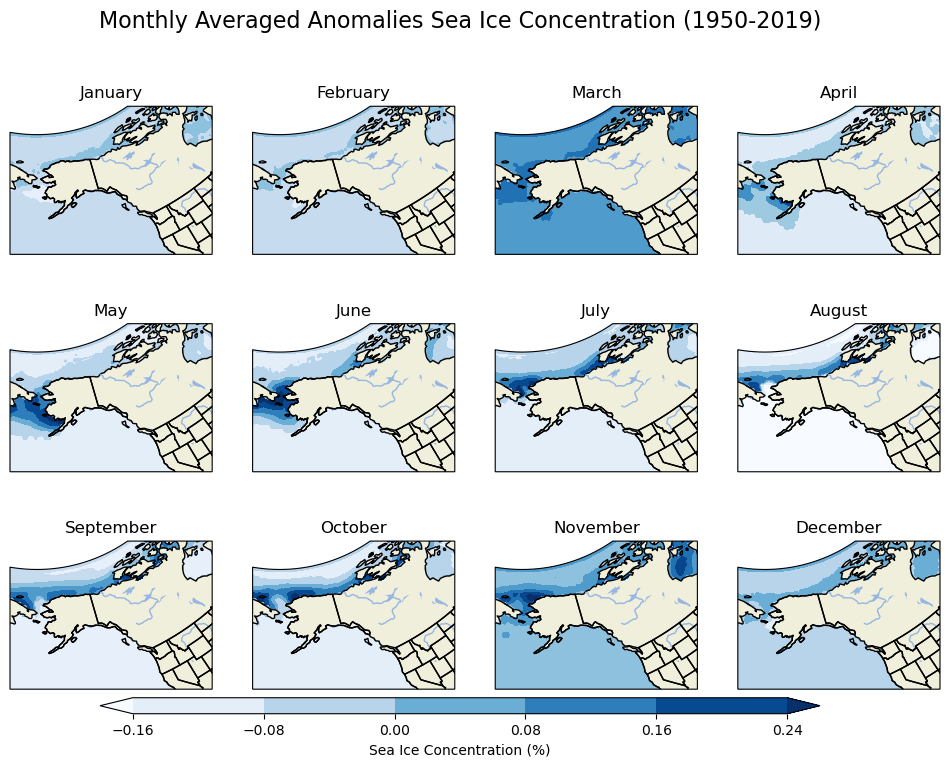

In [19]:
#Define the figure and the axir for the 3 rows and 4 columns
fig, axs = plt.subplots(nrows=3, ncols=4, 
                        subplot_kw= {'projection': ccrs.AlbersEqualArea(central_longitude=-170, central_latitude=60)},
                        figsize=(12, 8))

# we will flatten it into a 1D array
axs = axs.flatten()

# Loop over the months and plot the ice concentration
for i, ax in enumerate(axs):
    ax.set_extent(extent)
    ax.add_feature(cart.LAND)
    ax.add_feature(cart.COASTLINE)
    ax.add_feature(cart.BORDERS)
    ax.add_feature(cart.RIVERS)
    ax.add_feature(cart.STATES)
    ax.add_feature(cart.LAKES)
    ax.add_feature(cart.OCEAN)

    cs = ax.contourf(ds_anom['lon'], ds_anom['lat'], ds_anom['icec'][i],
                        transform=ccrs.PlateCarree(), cmap='Blues', extend='both')
        
    ax.set_title(calendar.month_name[i+1])

# Add a colorbar below the plots
cbar_ax = fig.add_axes([0.2, 0.1, 0.6, 0.02])
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal')

cbar.set_label('Sea Ice Concentration (%)')
fig.suptitle('Monthly Averaged Anomalies Sea Ice Concentration (1950-2019)', fontsize=16)  
plt.show()